In [ ]:
#import all necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Created the data structure using cookey cutter data science template.
# saved the downloaded CSV file in raw data folder.
# import file and create dataframe


df = pd.read_csv("../data/raw/colorectal_cancer_dataset.csv")

In [4]:
# lets check the head of the dataframe
df.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
0,1,UK,77,M,Localized,69,No,No,Yes,Overweight,...,Yes,No,54413,50,5,Urban,Developed,Moderate,Insured,Yes
1,2,UK,59,M,Localized,33,No,No,No,Overweight,...,Yes,No,76553,37,25,Urban,Developing,High,Uninsured,Yes
2,3,Japan,66,M,Regional,17,No,Yes,No,Normal,...,Yes,No,62805,54,27,Urban,Developed,Moderate,Uninsured,No
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
4,5,France,66,M,Localized,34,No,Yes,No,Normal,...,Yes,No,66425,15,27,Urban,Developing,High,Insured,Yes


In [5]:
# check null values in any of the features

df.isnull().sum()

Patient_ID                    0
Country                       0
Age                           0
Gender                        0
Cancer_Stage                  0
Tumor_Size_mm                 0
Family_History                0
Smoking_History               0
Alcohol_Consumption           0
Obesity_BMI                   0
Diet_Risk                     0
Physical_Activity             0
Diabetes                      0
Inflammatory_Bowel_Disease    0
Genetic_Mutation              0
Screening_History             0
Early_Detection               0
Treatment_Type                0
Survival_5_years              0
Mortality                     0
Healthcare_Costs              0
Incidence_Rate_per_100K       0
Mortality_Rate_per_100K       0
Urban_or_Rural                0
Economic_Classification       0
Healthcare_Access             0
Insurance_Status              0
Survival_Prediction           0
dtype: int64

In [6]:
# Sinnce, there is no null values so data is probably cleaned.
# lets check the shape and duplicate rows

df.shape, df.duplicated().sum()


((167497, 28), np.int64(0))

In [7]:
# there is no duplicate rows in the data, 
# let get info of the data types and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167497 entries, 0 to 167496
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   Patient_ID                  167497 non-null  int64 
 1   Country                     167497 non-null  object
 2   Age                         167497 non-null  int64 
 3   Gender                      167497 non-null  object
 4   Cancer_Stage                167497 non-null  object
 5   Tumor_Size_mm               167497 non-null  int64 
 6   Family_History              167497 non-null  object
 7   Smoking_History             167497 non-null  object
 8   Alcohol_Consumption         167497 non-null  object
 9   Obesity_BMI                 167497 non-null  object
 10  Diet_Risk                   167497 non-null  object
 11  Physical_Activity           167497 non-null  object
 12  Diabetes                    167497 non-null  object
 13  Inflammatory_Bowel_Disease  1

In [8]:
# check the description of the data
df.describe()   

,Patient_ID,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
count,167497.000000,167497.00000,167497.000000,167497.000000,167497.000000,167497.000000
mean,83749.000000,69.20078,42.005708,72452.168099,34.531562,17.023875
std,48352.363357,11.87247,21.672206,27402.779597,14.447970,7.208766
min,1.000000,30.00000,5.000000,25000.000000,10.000000,5.000000
25%,41875.000000,59.00000,23.000000,48760.000000,22.000000,11.000000
50%,83749.000000,69.00000,42.000000,72344.000000,35.000000,17.000000
75%,125623.000000,79.00000,61.000000,96227.000000,47.000000,23.000000
max,167497.000000,89.00000,79.000000,119999.000000,59.000000,29.000000


In [9]:
# Since, data has lots of non-numerical columns, check the description of the non-numeric data

df.describe(include='object').T

,count,unique,top,freq
Country,167497,16,USA,25927
Gender,167497,2,M,100686
Cancer_Stage,167497,3,Regional,66981
Family_History,167497,2,No,117184
Smoking_History,167497,2,No,100141
Alcohol_Consumption,167497,2,Yes,83857
Obesity_BMI,167497,3,Overweight,67168
Diet_Risk,167497,3,Moderate,83871
Physical_Activity,167497,3,Moderate,67022
Diabetes,167497,2,No,133941


In [10]:
# check unique values in the Gender column
df['Gender'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
#check unique values in the all non-numerical columns 
for col in df.select_dtypes(exclude=['number']):
    print(f"{col}: {df[col].unique()}")

Country: ['UK' 'Japan' 'USA' 'France' 'Canada' 'Germany' 'China' 'South Korea'
 'Brazil' 'Italy' 'India' 'Pakistan' 'New Zealand' 'South Africa'
 'Australia' 'Nigeria']
Gender: ['M' 'F']
Cancer_Stage: ['Localized' 'Regional' 'Metastatic']
Family_History: ['No' 'Yes']
Smoking_History: ['No' 'Yes']
Alcohol_Consumption: ['Yes' 'No']
Obesity_BMI: ['Overweight' 'Normal' 'Obese']
Diet_Risk: ['Low' 'Moderate' 'High']
Physical_Activity: ['Low' 'Moderate' 'High']
Diabetes: ['No' 'Yes']
Inflammatory_Bowel_Disease: ['No' 'Yes']
Genetic_Mutation: ['No' 'Yes']
Screening_History: ['Regular' 'Irregular' 'Never']
Early_Detection: ['Yes' 'No']
Treatment_Type: ['Combination' 'Chemotherapy' 'Surgery' 'Radiotherapy']
Survival_5_years: ['Yes' 'No']
Mortality: ['No' 'Yes']
Urban_or_Rural: ['Urban' 'Rural']
Economic_Classification: ['Developed' 'Developing']
Healthcare_Access: ['Moderate' 'High' 'Low']
Insurance_Status: ['Insured' 'Uninsured']
Survival_Prediction: ['Yes' 'No']


In [12]:
# droping patient ID and country columns as they are not useful for analysis
# and also not useful for training the model as well

new_df = df.drop(['Patient_ID', 'Country'], axis=1)

In [14]:
# Create lists of numerical and non-numerical features for further analysis and future use

numerical_features = new_df.select_dtypes(include=['number']).columns.tolist()
non_numerical_features = new_df.select_dtypes(exclude=['number']).columns.tolist()

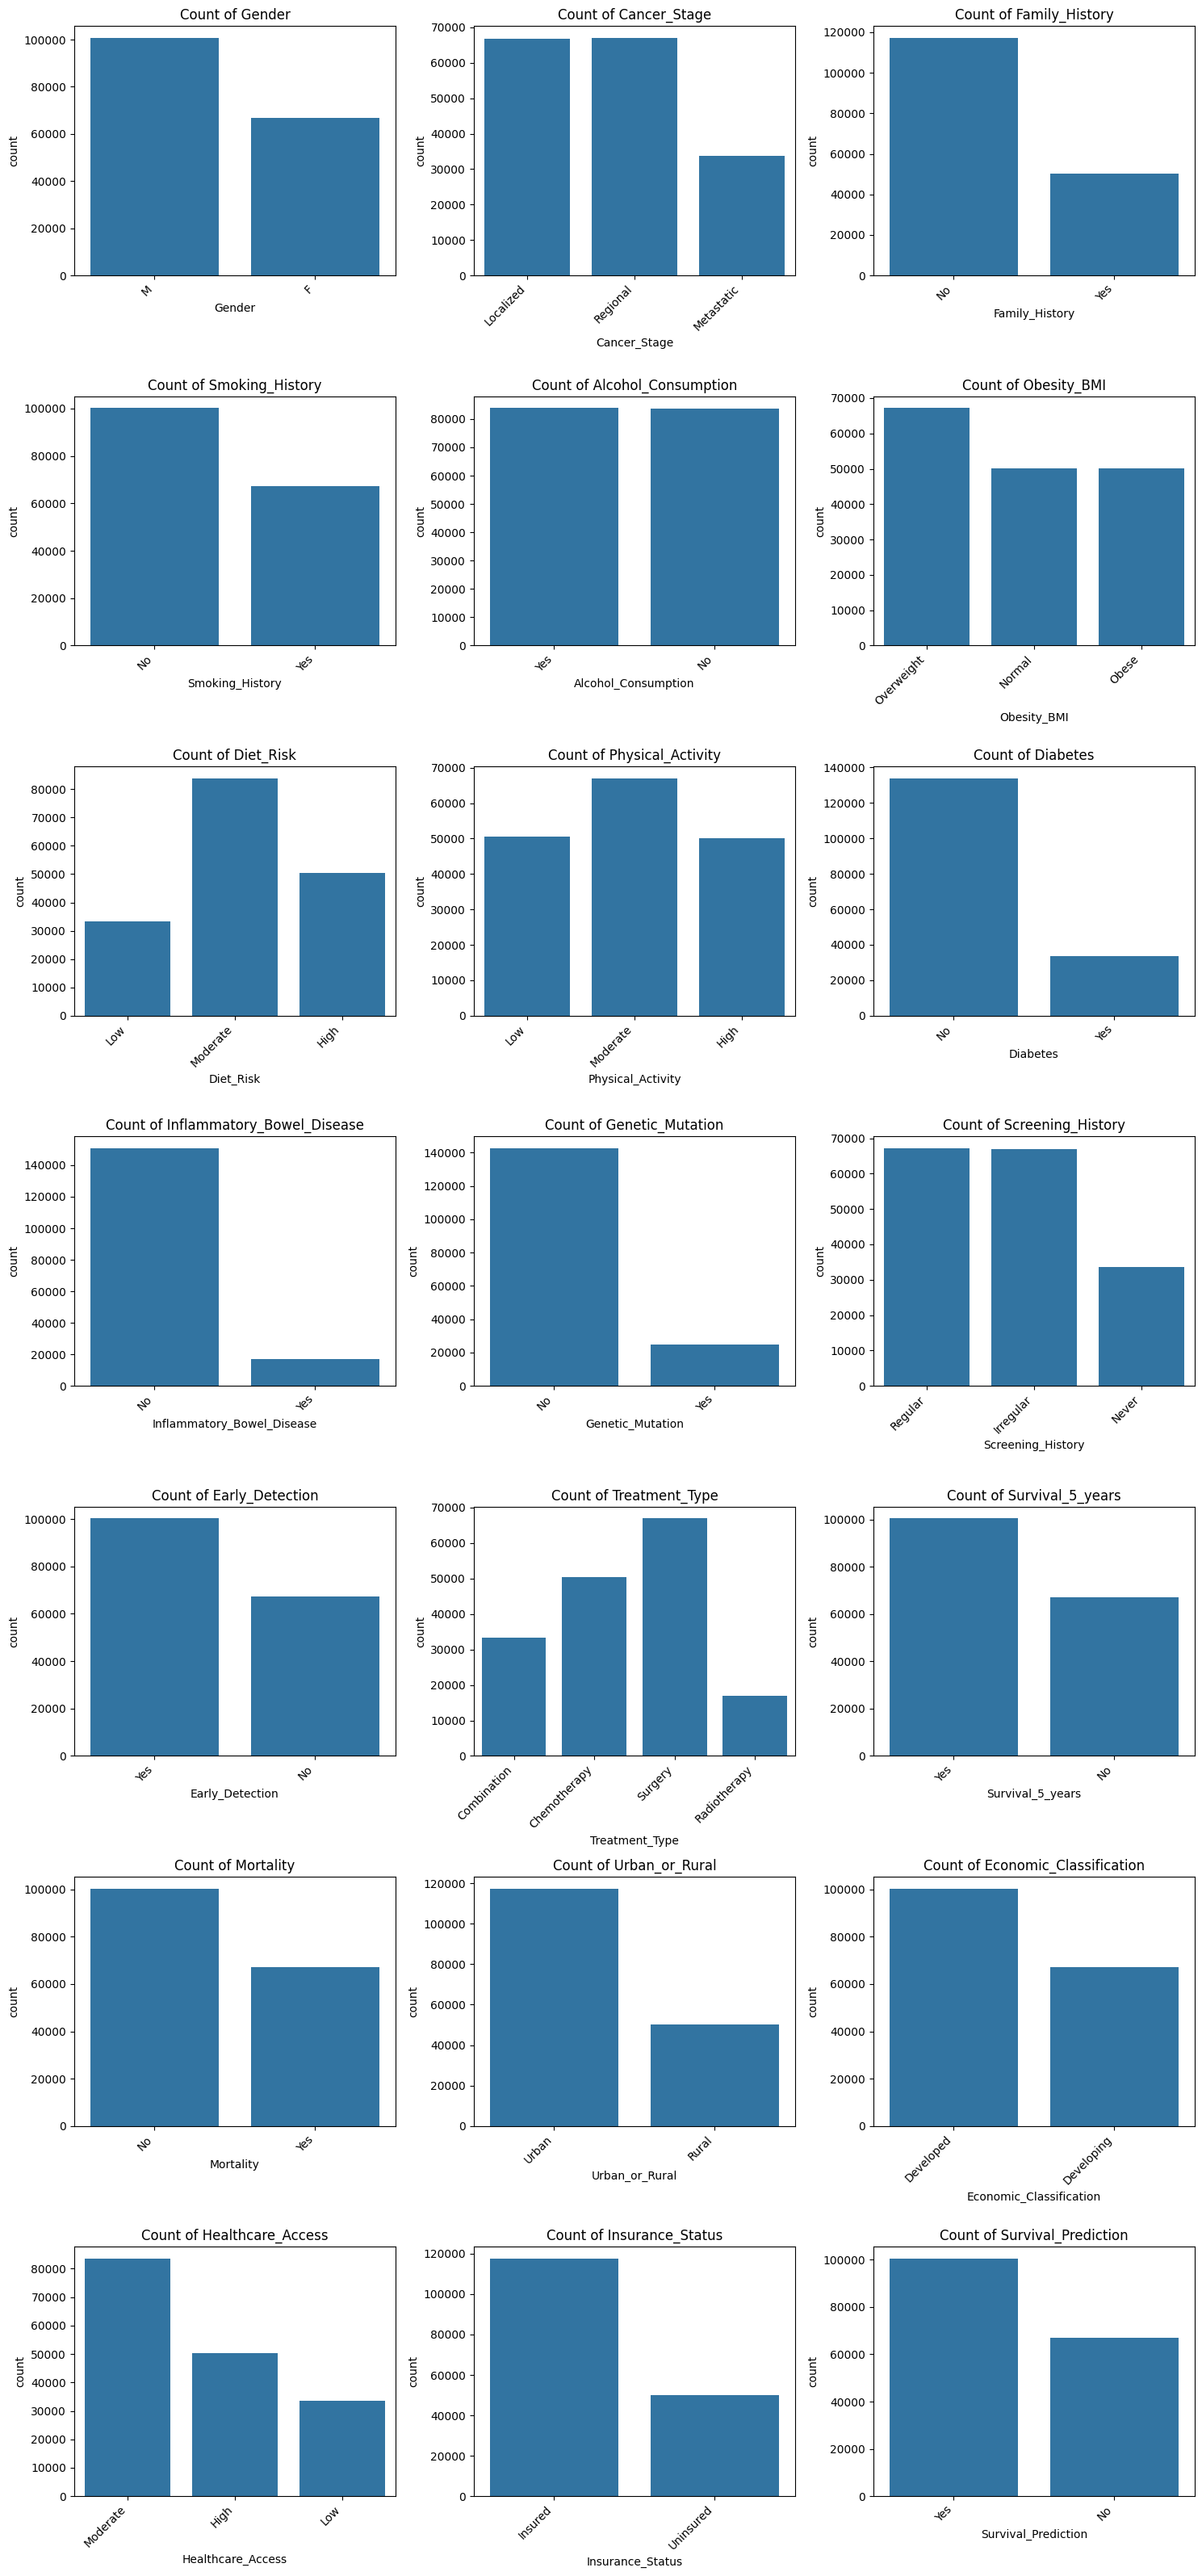

In [ ]:
# in visualization, we will use the non-numerical features to plot the distribution 

plt.figure(figsize=(15, 32))
for i, col in enumerate(non_numerical_features):
    plt.subplot(7, 3, i+1 )
    sns.countplot(x=col, data=new_df)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

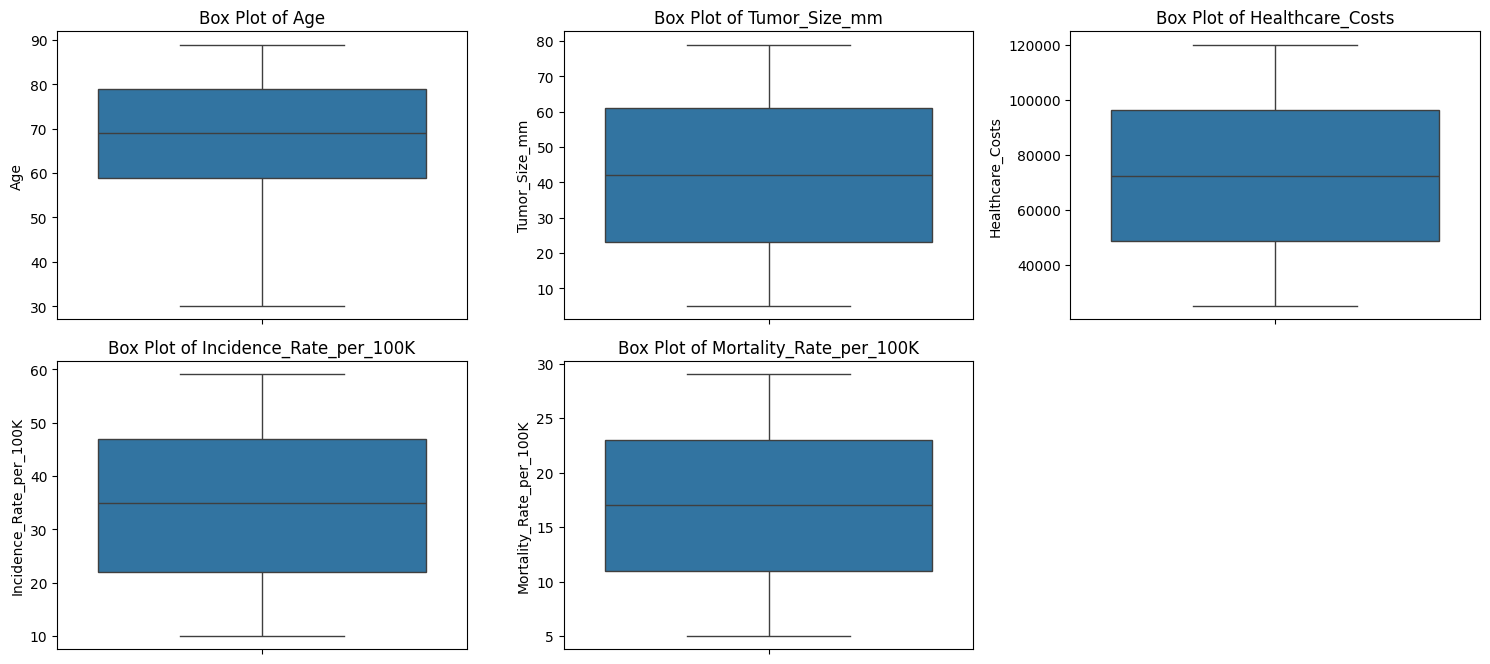

In [16]:
# create box plot for numerical features to check the distribution of the data

plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_features):
        plt.subplot(3, 3, i + 1)  
        sns.boxplot(y=col, data=new_df)
        plt.title(f'Box Plot of {col}')
plt.tight_layout()  
plt.show()

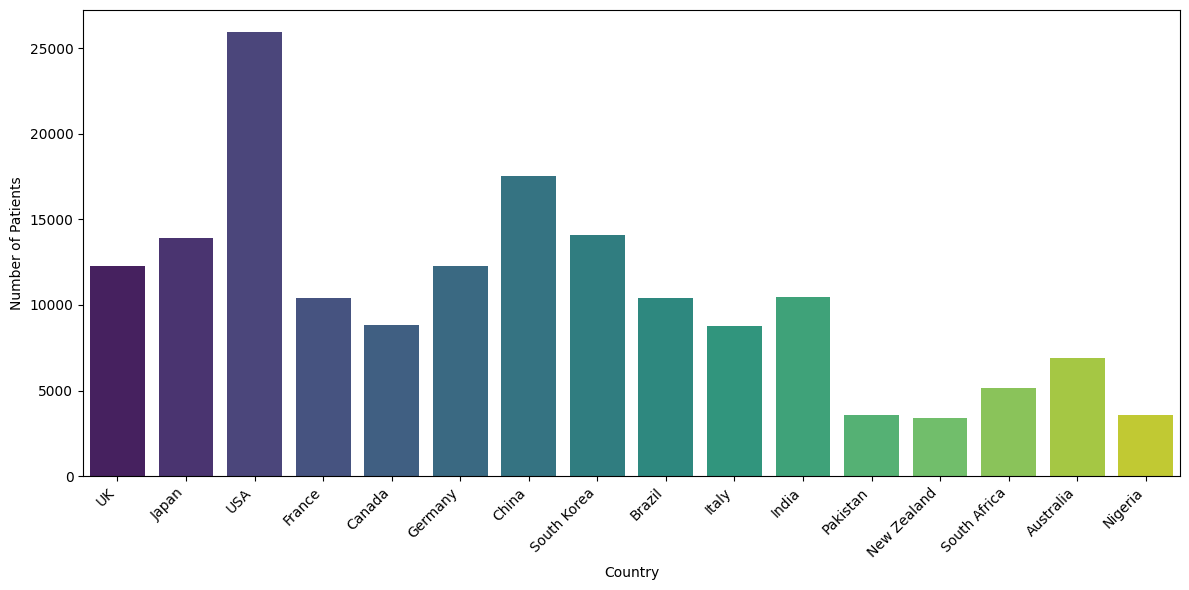

In [18]:
# distribution of data across different Countries

plt.figure(figsize=(12, 6)) 
sns.countplot(x='Country', data=df, hue = df.Country, palette='viridis') 
plt.xlabel('Country')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show();

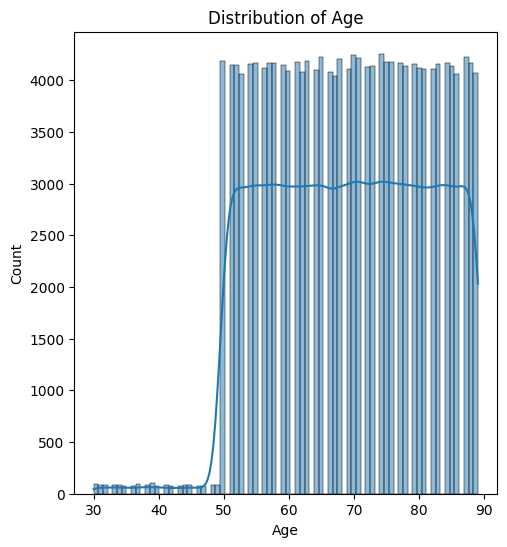

In [19]:
# histogram Distribution of Age in the dataset

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

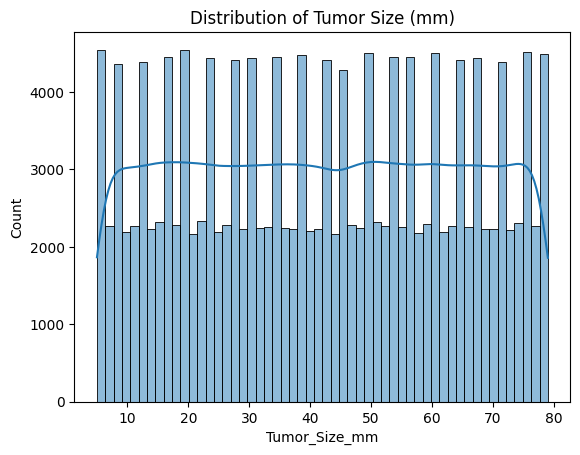

In [20]:
#distribution of tumor size in the dataset

sns.histplot(df['Tumor_Size_mm'], kde=True)
plt.title('Distribution of Tumor Size (mm)')
plt.show()

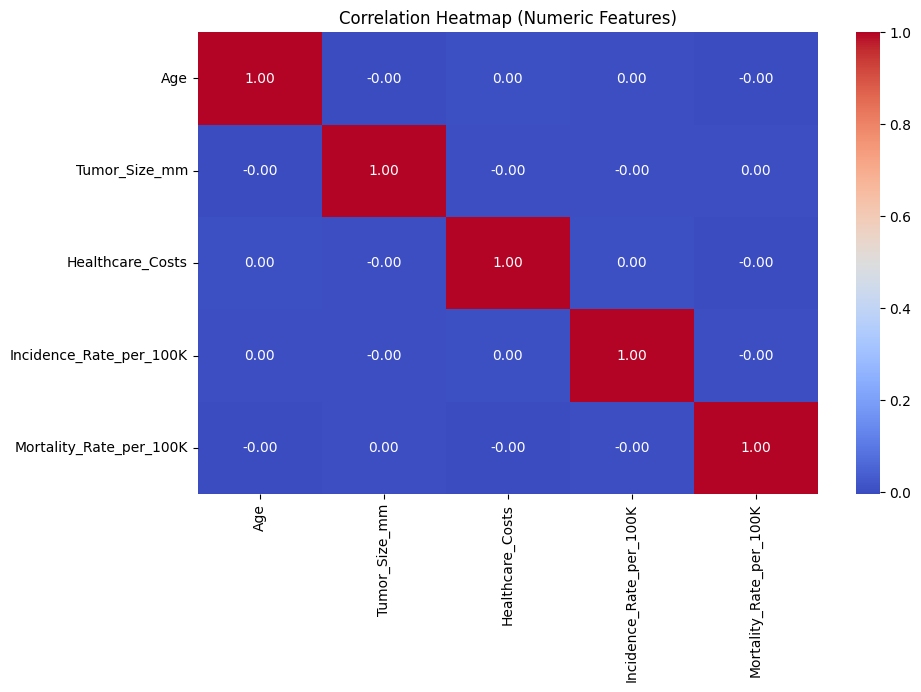

In [21]:
# Healpmap to check the correlation between numerical features

numeric_cols = new_df.select_dtypes(include=['number']).columns
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numeric Features)')
plt.show()

In [22]:
# List of non-numerical features to analyze against 'Survival_Prediction'
features_to_analyze = ['Gender', 'Cancer_Stage', 'Family_History', 'Smoking_History', 'Alcohol_Consumption', 'Obesity_BMI',  'Diabetes',  'Early_Detection', 'Treatment_Type', 'Urban_or_Rural', 'Economic_Classification', 'Healthcare_Access', 'Insurance_Status']


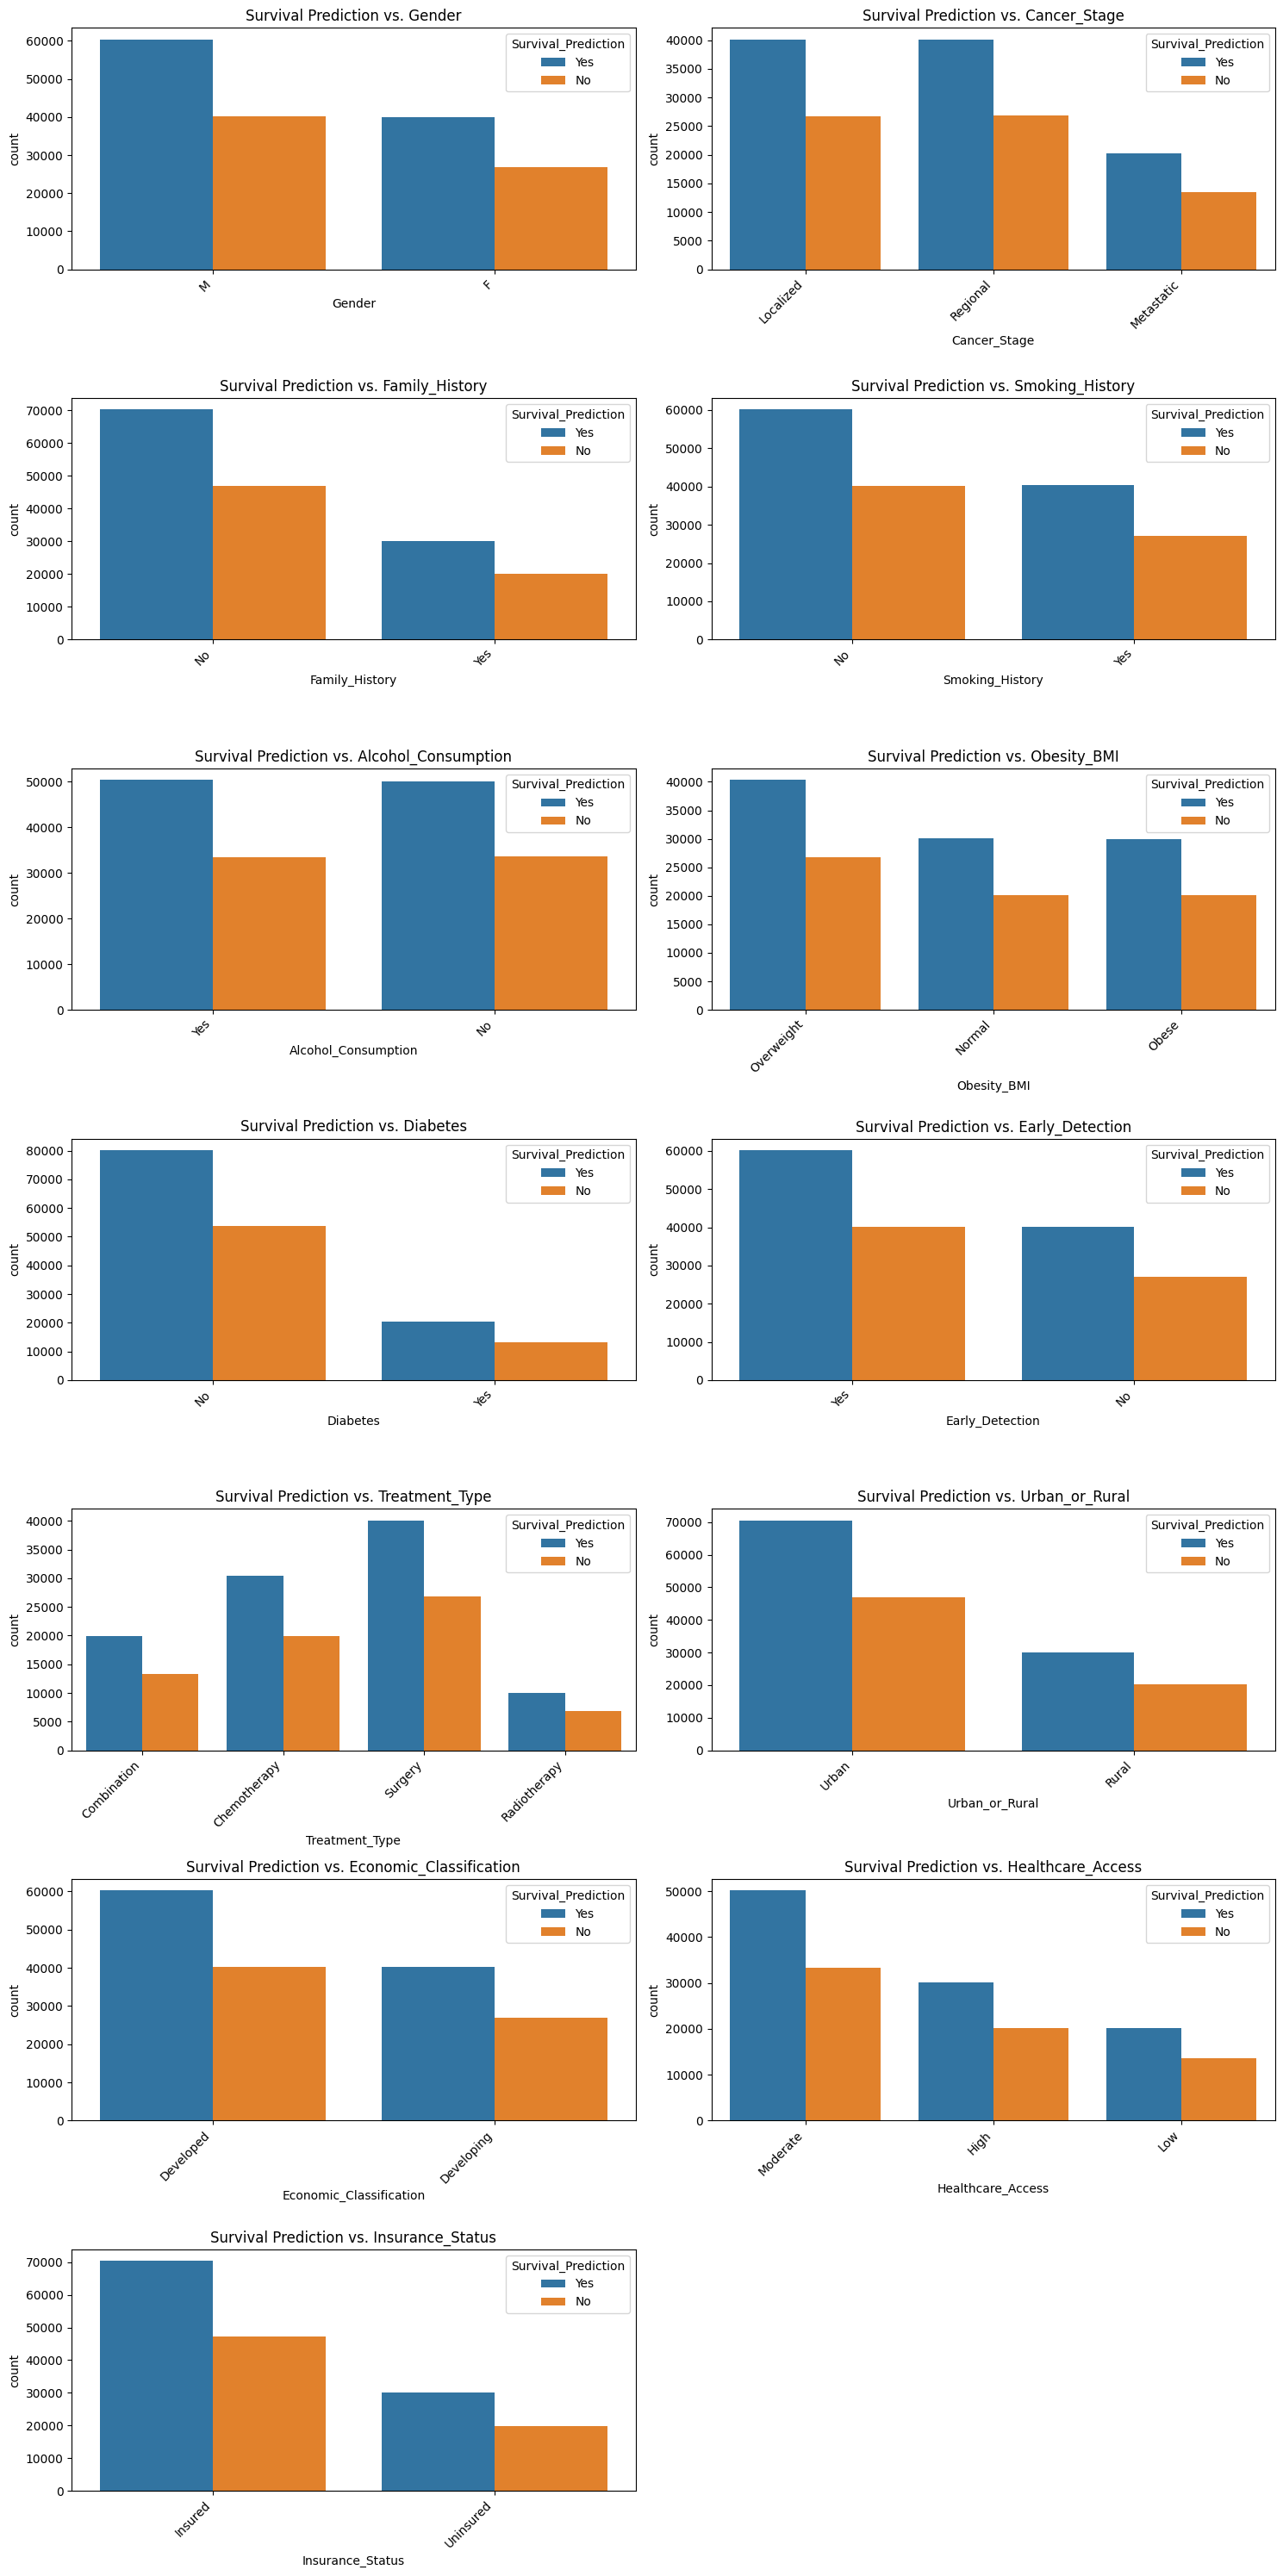

In [23]:
# Create count plots for each non-numerical feature against 'Survival_Prediction'
plt.figure(figsize=(15, 30))
for i, feature in enumerate(features_to_analyze):
    plt.subplot(7, 2, i + 1) 
    sns.countplot(x=feature, hue='Survival_Prediction', data=new_df)
    plt.title(f'Survival Prediction vs. {feature}')
    plt.xticks(rotation=45, ha='right')  
    plt.tight_layout() 

plt.show()

In [24]:
# Group data by 'Country' and calculate the mean of numerical features
grouped_df = df.groupby('Country')[numerical_features].mean()
# save the grouped dataframe to a csv file
grouped_df.to_csv("../data/processed/grouped_data.csv", index=True)
grouped_df.head()

,Age,Tumor_Size_mm,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K
Country,,,,,
Australia,68.995638,42.091173,72110.752363,34.756725,17.036935
Brazil,69.362343,42.010482,72810.656986,34.427830,17.043947
Canada,69.356390,42.372605,72213.778773,34.463318,17.133915
China,69.254779,41.905449,72510.740143,34.647932,16.976833
France,69.292922,42.391233,72524.881067,34.505083,17.026952


In [25]:
# to create another model to predict futur cost of healthcare, Create the USA datafream from df
usa_data = df[df['Country'] == 'USA']
usa_data.to_csv("../data/processed/usa_data.csv", index=False)
usa_data.head()

,Patient_ID,Country,Age,Gender,Cancer_Stage,Tumor_Size_mm,Family_History,Smoking_History,Alcohol_Consumption,Obesity_BMI,...,Survival_5_years,Mortality,Healthcare_Costs,Incidence_Rate_per_100K,Mortality_Rate_per_100K,Urban_or_Rural,Economic_Classification,Healthcare_Access,Insurance_Status,Survival_Prediction
3,4,USA,83,M,Regional,14,No,No,No,Obese,...,Yes,No,89393,45,11,Urban,Developed,Moderate,Insured,Yes
8,9,USA,50,M,Regional,48,Yes,No,No,Overweight,...,No,Yes,47269,23,11,Rural,Developing,Low,Insured,Yes
20,21,USA,53,M,Metastatic,65,No,No,No,Overweight,...,No,No,88454,51,22,Rural,Developed,Moderate,Uninsured,Yes
23,24,USA,78,M,Localized,56,No,No,No,Overweight,...,Yes,No,55162,35,10,Urban,Developing,Moderate,Uninsured,No
31,32,USA,84,M,Localized,57,Yes,No,Yes,Normal,...,No,No,99469,24,22,Urban,Developing,Moderate,Insured,Yes


In [ ]:
# Further steps to be taken in data preprocessing and feature engineering
# 1. Handle categorical variables (e.g., one-hot encoding or label encoding)
# 2. Normalize or standardize numerical features if needed
# 3. Identify the target variable for prediction (e.g., 'Survival_Prediction', 'Healthcare_Cost', 'Survival_5_Years')
